In [1]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

paragraph = """Rudyard Kipling was an English poet and novelist. He is remembered for his children’s books including the ever-popular The Jungle Book and Kim. He was a strong advocate of the British Empire. He was awarded the Nobel Prize in literature in 1907.
            ‘Values in Life’ appears in A Book of Words a volume of Kipling’s collected speeches. The address was originally delivered in the fall of 1907 to the students of McGill University in Montreal, Canada.
            Kipling starts the speech with the comment about the custom of inviting scholars to speak or guide the students at educational institutes. Here he humorously says that on such occasion students pretend to show polite interest and reverence and the scholars pretend to look virtuous. On such occasions very little truth is spoken and he, too will follow that custom (He will try not to depart from the convention).
            Kipling further says that he will not discuss the truth that..
            – Sins of youth are due to its virtues.
            – Arrogance is the result of its innate shyness.
            – Brutality is the outcome of its natural virginity of spirit.
            Mainly the speech is an advice to the youth to keep off from the idea of wealth for wealth’s sake or money madness. According to Kipling there is a well organized conspiracy in the world for an idea of wealth for wealth’s sake(money madness/ greed) and students should not fall into this trap.
            Some students will violently oppose money madness but we have to accept that we live, eat, move, etc. – in the world dominated by it. And, not soon, but eventually some people may submit to the money minded mentality of the world. However, there are some men upon whom the idea of wealth as mere wealth does not work. Neither the methods of amassing wealth interest them, nor do they have any price tag.
            Such a person is not considered smart. But after studying the man closely, people would realise that money dominates everybody accept that man who doesn’t want money. Whatever money minded people gain, he will gain more. He will always be more powerful than the rest of the wealth seekers.(His little finger will be thicker than your lions.) He will be fearless and do whatever he wants. On the other hand money minded people would fear him and would be controlled by him.
            Kipling advises the youth to give up the obsession of wealth for wealth’s sake. Even, for a selfless purpose, people should never indulge in amassing money with their both hands, forgetting their prime goal of honest work. Money madness makes us stoop or lose our soul.
            According to Kipling youth should be the season of hope, ambition, upliftment, cheerfulness, and not the season of depressions, despondency (disheartenment),doubts, wavering(flickering), loneliness, worthlessness. It is hell if you think like that.
            We must drive egotism away from our life by losing our-self and indulging in selfless activities. In other words, take anything and everything seriously except yourself.
            In conclusion, Kipling advises the youth not to be smart, and if anyone tries to be smart in his work, talk, play -just lead him, lovingly but firmly, to a knowledge of higher and more interesting things."""

In [2]:
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [3]:
sentences = nltk.sent_tokenize(text)
sentences

['rudyard kipling was an english poet and novelist.',
 'he is remembered for his children’s books including the ever-popular the jungle book and kim.',
 'he was a strong advocate of the british empire.',
 'he was awarded the nobel prize in literature in .',
 '‘values in life’ appears in a book of words a volume of kipling’s collected speeches.',
 'the address was originally delivered in the fall of to the students of mcgill university in montreal, canada.',
 'kipling starts the speech with the comment about the custom of inviting scholars to speak or guide the students at educational institutes.',
 'here he humorously says that on such occasion students pretend to show polite interest and reverence and the scholars pretend to look virtuous.',
 'on such occasions very little truth is spoken and he, too will follow that custom (he will try not to depart from the convention).',
 'kipling further says that he will not discuss the truth that.. – sins of youth are due to its virtues.',
 '– a

In [4]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [5]:
sent_word

[['rudyard',
  'kipling',
  'was',
  'an',
  'english',
  'poet',
  'and',
  'novelist',
  '.'],
 ['he',
  'is',
  'remembered',
  'for',
  'his',
  'children',
  '’',
  's',
  'books',
  'including',
  'the',
  'ever-popular',
  'the',
  'jungle',
  'book',
  'and',
  'kim',
  '.'],
 ['he',
  'was',
  'a',
  'strong',
  'advocate',
  'of',
  'the',
  'british',
  'empire',
  '.'],
 ['he',
  'was',
  'awarded',
  'the',
  'nobel',
  'prize',
  'in',
  'literature',
  'in',
  '.'],
 ['‘',
  'values',
  'in',
  'life',
  '’',
  'appears',
  'in',
  'a',
  'book',
  'of',
  'words',
  'a',
  'volume',
  'of',
  'kipling',
  '’',
  's',
  'collected',
  'speeches',
  '.'],
 ['the',
  'address',
  'was',
  'originally',
  'delivered',
  'in',
  'the',
  'fall',
  'of',
  'to',
  'the',
  'students',
  'of',
  'mcgill',
  'university',
  'in',
  'montreal',
  ',',
  'canada',
  '.'],
 ['kipling',
  'starts',
  'the',
  'speech',
  'with',
  'the',
  'comment',
  'about',
  'the',
  'custom',

In [6]:
for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                if word not in stopwords.words('english')]

In [7]:
sent_word

[['rudyard', 'kipling', 'english', 'poet', 'novelist', '.'],
 ['remembered',
  'children',
  '’',
  'books',
  'including',
  'ever-popular',
  'jungle',
  'book',
  'kim',
  '.'],
 ['strong', 'advocate', 'british', 'empire', '.'],
 ['awarded', 'nobel', 'prize', 'literature', '.'],
 ['‘',
  'values',
  'life',
  '’',
  'appears',
  'book',
  'words',
  'volume',
  'kipling',
  '’',
  'collected',
  'speeches',
  '.'],
 ['address',
  'originally',
  'delivered',
  'fall',
  'students',
  'mcgill',
  'university',
  'montreal',
  ',',
  'canada',
  '.'],
 ['kipling',
  'starts',
  'speech',
  'comment',
  'custom',
  'inviting',
  'scholars',
  'speak',
  'guide',
  'students',
  'educational',
  'institutes',
  '.'],
 ['humorously',
  'says',
  'occasion',
  'students',
  'pretend',
  'show',
  'polite',
  'interest',
  'reverence',
  'scholars',
  'pretend',
  'look',
  'virtuous',
  '.'],
 ['occasions',
  'little',
  'truth',
  'spoken',
  ',',
  'follow',
  'custom',
  '(',
  'try',


In [8]:
model = Word2Vec(sent_word,min_count=1)

words = model.wv.vocab

In [9]:
vector = model.wv['smart']

print(vector)

[-1.7106647e-03 -1.5167472e-03  1.7755687e-04  2.8645811e-03
  3.1559144e-03 -4.2018066e-03  1.1332894e-03 -2.0160377e-03
  3.9431243e-03  2.2067062e-03 -2.1459884e-03 -1.6985176e-03
 -1.1606925e-03  2.5732710e-03  3.3091619e-03  4.6247076e-03
  4.2517320e-03  8.0463587e-04  4.6118959e-03 -2.3962094e-03
  2.5238933e-03 -1.5296434e-03  8.3879131e-04  1.3525505e-03
  4.4632799e-04 -2.9521722e-03  1.0614729e-03  3.7218060e-04
  4.1824607e-03 -7.6966645e-04  3.2934318e-03 -2.8251742e-03
  3.7366585e-04  3.0157855e-03 -4.1810824e-03  1.5851053e-03
  1.1590039e-03 -3.9969815e-04  2.1521139e-03 -1.0102410e-03
 -4.3183807e-03 -2.2986671e-03 -2.0877374e-04  1.0504163e-03
 -3.8631400e-03  5.0179055e-04 -2.3023169e-03  1.7475270e-03
  2.9316719e-03 -3.1258452e-03  4.1560163e-03 -1.4835426e-03
  1.8941162e-03  1.3150771e-04 -4.8159175e-03  3.3886135e-03
 -2.9693022e-03 -3.2051685e-04  9.9299918e-04 -4.2655524e-03
  1.1499556e-03 -3.5667461e-03 -3.8236342e-03 -4.0294421e-03
 -4.7548930e-03  1.40923

In [10]:
similar = model.wv.most_similar('smart',topn=5)

similar

[('soon', 0.25918591022491455),
 ('man', 0.25570690631866455),
 ('never', 0.23591750860214233),
 ('finger', 0.2259494811296463),
 ('worthlessness', 0.21775150299072266)]

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


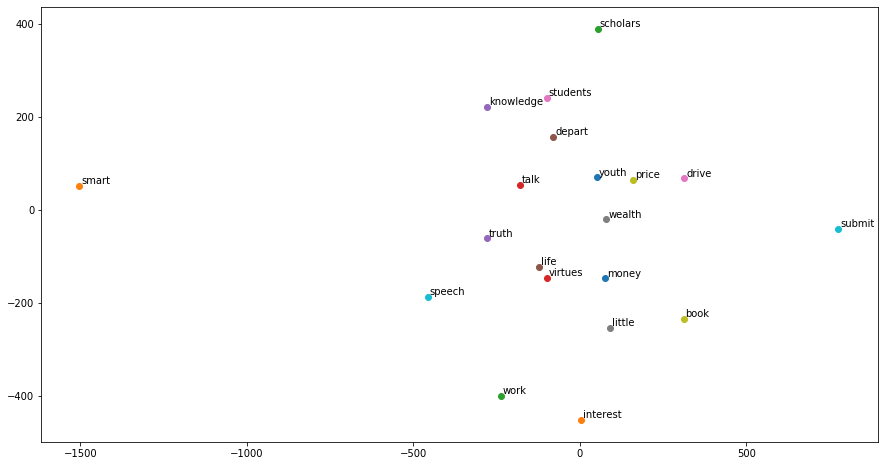

In [11]:
from sklearn.manifold import  TSNE
vocab = ['youth','smart','work','talk','knowledge',
         'life','drive','wealth','price','submit',
        'money','interest','scholars','virtues','truth',
        'depart','students','little','book','speech']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)